# Titanic: Machine Learning from Disaster
#### References: https://github.com/minsuk-heo/kaggle-titanic/tree/master
![Titanic.jpg](https://github.com/minsuk-heo/kaggle-titanic/blob/master/images/titanic-disaster.jpg?raw=true)

## Predict survival on the Titanic
1. Defining the problem statement
2. Collecting the data
3. Exploratory data analysis
4. Feature engineeing
5. Feature selection
6. Modeling
7. Testing

## 1. Defining the problem statement
### Complete the analysis of what sorts of people were likely to survive.
### In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


## 2. Collecting the data

In [322]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/test.csv')

display(train)
display(test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3. Exploratory Data Analysis (EDA)

### Data Dictionary
- PassengerId: 승객 고유 Id
- Survived: 생존 여부 
- Pclass: 객실 등급
- Name: 승객 이름
- Sex: 성별
- Age: 나이
- SibSp: 동승 형제 or 배우자 수
- Parch: 동승 부모 or 자녀 수
- Ticket: 티켓 번호
- Fare: 지불 요금
- Cabin: 선실 번호
- Embarked: 출항지

In [323]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [324]:
# 누락행 개수 확인
print(train.isnull().sum())
print("\n")
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [325]:
print(train['Age'].sum())
print(list(train['Age'])) # 0.75, 45.5, 0.67과 같이 정수형이 아닌 실수형으로도 존재한다.

21205.17
[22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, nan, 31.0, nan, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, nan, 19.0, nan, nan, 40.0, nan, nan, 66.0, 28.0, 42.0, nan, 21.0, 18.0, 14.0, 40.0, 27.0, nan, 3.0, 19.0, nan, nan, nan, nan, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, nan, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, nan, nan, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, nan, nan, 0.83, 30.0, 22.0, 29.0, nan, 28.0, 17.0, 33.0, 16.0, nan, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, nan, 71.0, 23.0, 34.0, 34.0, 28.0, nan, 21.0, 33.0, 37.0, 28.0, 21.0, nan, 38.0, nan, 47.0, 14.5, 22.0, 20.0, 17.0, 21.0, 70.5, 29.0, 24.0, 2.0, 21.0, nan, 32.5, 32.5, 54.0, 12.0, nan, 24.0, nan, 45.0, 33.0, 20.0, 47.0, 29.0, 25.0, 23.0, 19.0, 37.0, 16.0, 24.0, nan, 22.0, 24.0, 19.0, 18.0, 19.0, 27.0, 9.0, 36.5, 42.0, 51.0, 22.0, 55.5, 40.5, nan, 51.0, 16.0, 30.0, nan, nan, 44.0, 40.0, 26.0, 17.0, 1.0, 9.0, nan, 45.0, nan, 28.0, 61.0, 4.0, 1.0, 

In [326]:
print('Pclass 고유값:', train['Pclass'].unique()) # 객실 등급
print('SibSp 고유값:', train['SibSp'].unique()) # 동승 형제 or 배우자 수
print('Parch 고유값:', train['Parch'].unique()) # 동승 부모 or 자녀 수
print('Ticket 고유값 개수:', len(train['Ticket'].unique())) # 티켓 번호 개수
print('Cabin 고유값:', train['Cabin'].unique()) # 선실 번호
print('Embarked 고유값:', train['Embarked'].unique()) # 출항지

Pclass 고유값: [3 1 2]
SibSp 고유값: [1 0 3 4 2 5 8]
Parch 고유값: [0 1 2 5 3 4 6]
Ticket 고유값 개수: 681
Cabin 고유값: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B1

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp
- Parch
- Embarked
- Cabin

In [328]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts() # Series
    dead = train[train['Survived'] == 0][feature].value_counts() # Series
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    display(df)
    df.plot(kind='bar', stacked=True, figsize=(10,5))

,female,male
Survived,233,109
Dead,81,468


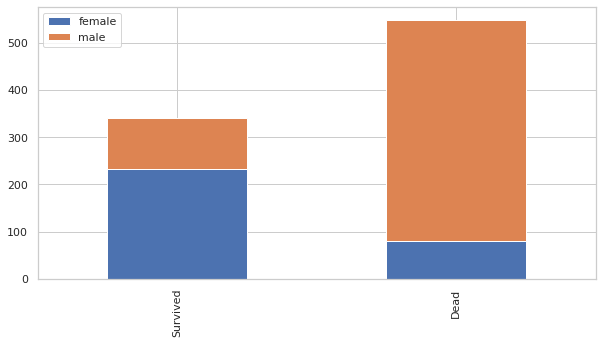

In [329]:
bar_chart('Sex')

#### The Chart confirms **Women** more likely survived than **Men**

,1,2,3
Survived,136,87,119
Dead,80,97,372


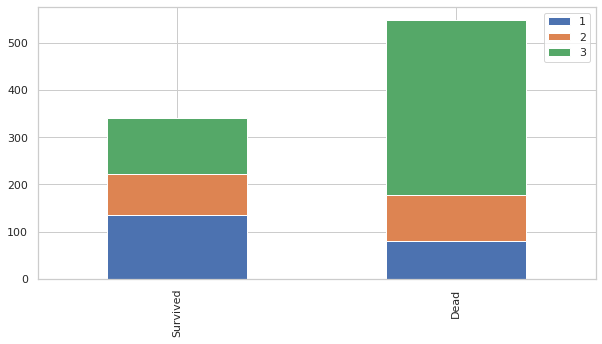

In [330]:
bar_chart('Pclass')

#### The Chart confirms **1st class** more likely survived than **other classes**
#### The Chart confirms **3rd class** more likely survived than **other classes**

,0,1,2,3,4,5,8
Survived,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


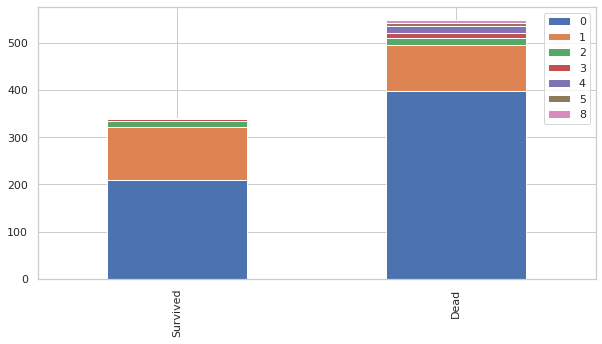

In [331]:
bar_chart('SibSp')

#### The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived
#### The Chart confirms **a person aboarded without siblings or spouse** more likely dead

,0,1,2,3,4,5,6
Survived,233.0,65.0,40.0,3.0,NaN,1.0,NaN
Dead,445.0,53.0,40.0,2.0,4.0,4.0,1.0


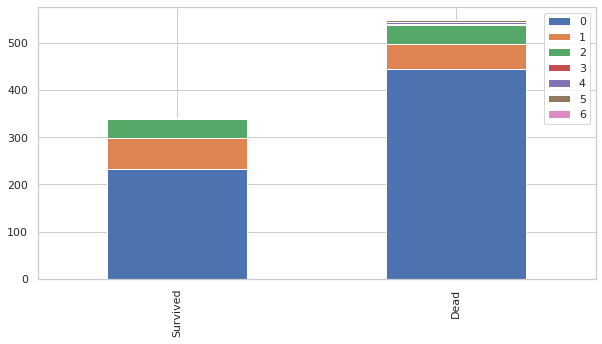

In [332]:
bar_chart('Parch')

#### The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived
#### The Chart confirms **a person aboarded alone** more likely dead

,S,C,Q
Survived,217,93,30
Dead,427,75,47


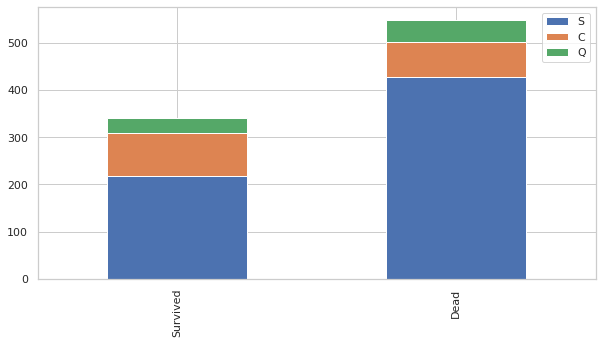

In [333]:
bar_chart('Embarked')

#### The Chart confirms **a person aboarded from C** slightly more likely survived
#### The Chart confirms **a person aboarded from Q** more likely dead
#### The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature Engineeing
#### **`Feature Engineering`** is the process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.
#### Feature vector is an n-dimensional vector of numerical features that represent some object.
#### Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis.

In [334]:
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 4.1 How Titanic sank?
#### Sank from the bow of the ship where third class rooms located 
#### Conclusion, Pclass is key feature for classifier

In [335]:
from IPython.display import Image

Image(url="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

### 4.2 Name

In [336]:
# Combining train and test dataset
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [337]:
print(train['Title'].value_counts())
print('\n')
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Lady          1
Sir           1
Mme           1
Countess      1
Capt          1
Jonkheer      1
Ms            1
Name: Title, dtype: int64


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64


#### Title map
- Mr: 0
- Miss: 1
- Mrs: 2
- Others: 3

In [338]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Major": 3, "Mlle": 3, "Col": 3, "Capt": 3, "Don": 3, "Jonkheer": 3, "Lady": 3, "Countess": 3, "Mme": 3, "Sir": 3, "Ms": 3, "Dona": 3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

display(train)
display(test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


,0,1,2,3
Survived,81,127,99,35
Dead,436,55,26,32


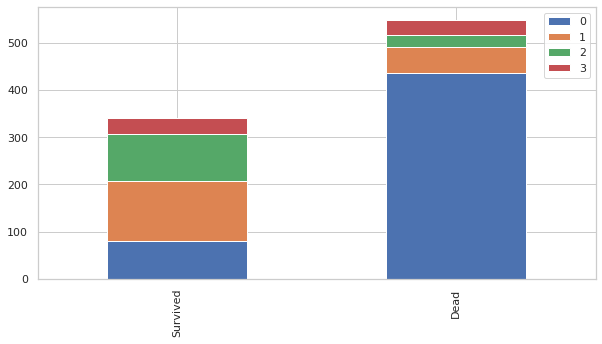

In [339]:
bar_chart('Title')

In [340]:
# delete unnecessary feature form dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

display(train.head(3))
display(test.head(3))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0


### 4.3 Sex
- male: 0
- female: 1

In [341]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

,0,1
Survived,109,233
Dead,468,81


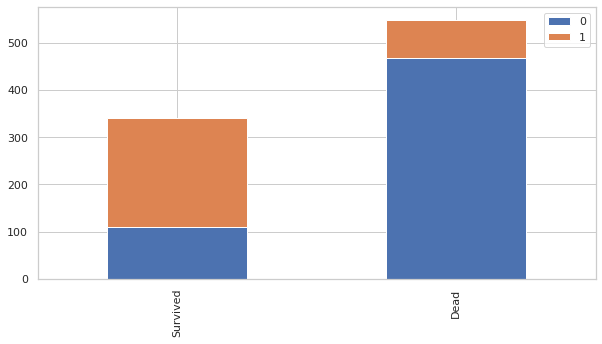

In [342]:
bar_chart('Sex')

### 4.4 Age
#### 4.4.1 Missing Values
fill missing age with median age for each title (Mr, Mrs, Miss, Others)

In [343]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


### groupby : Split -> Apply -> Combine
![groupby mechanism](https://t1.daumcdn.net/cfile/tistory/9978503F5B8264490F)

In [344]:
# 그룹별로 transform() 함수를 사용하여 NaN이 아닌 원소의 중앙값(median)을 계산하여 나이 누락값 채우기
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [345]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

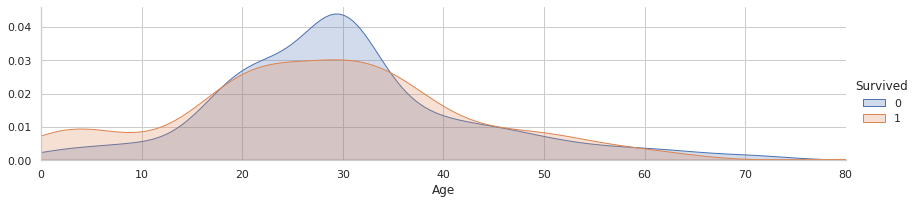

In [346]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

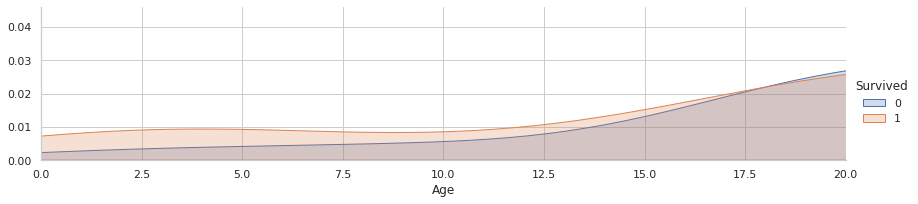

In [347]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(0, 20) # 0~20세

(20.0, 30.0)

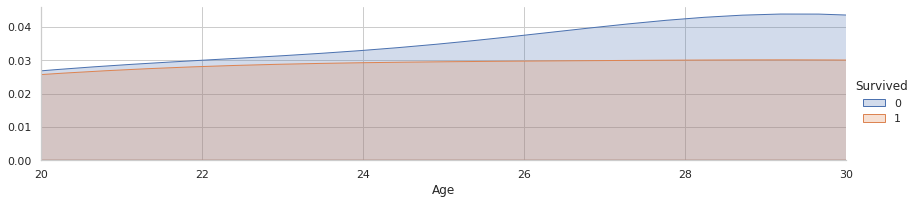

In [348]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(20, 30) # 20~30세

(30.0, 40.0)

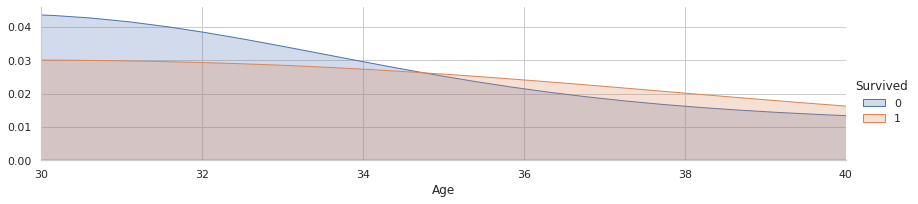

In [349]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(30, 40) # 30~40세

(40.0, 60.0)

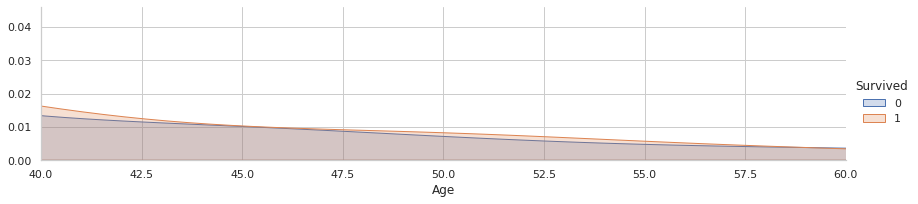

In [350]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(40, 60) # 40~60세

(60.0, 80.0)

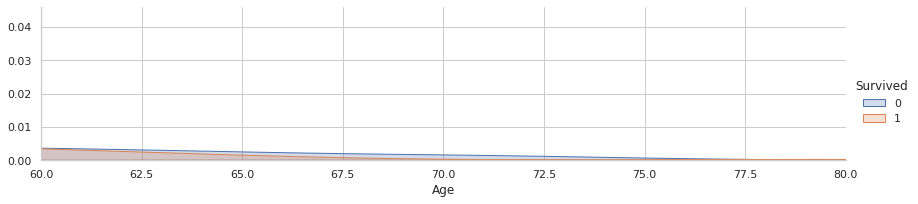

In [351]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.xlim(60) # 60세 이상

In [352]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

#### 4.4.2 Binning
##### **Binning / Converting Numerical Age to Categorical Variable**
feature vector map
- child: 0
- young: 1
- adult: 2
- mid-age: 3
- senior: 4

In [353]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 17, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 35), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 58), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 58, 'Age'] = 4

,2.0,1.0,3.0,0.0,4.0
Survived,105,91,76,63,7
Dead,209,151,113,55,21


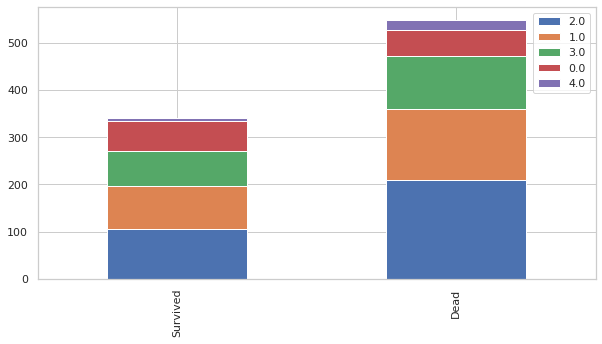

In [354]:
bar_chart('Age')

### 4.5 Embarked
#### 4.5.1 filling missing values

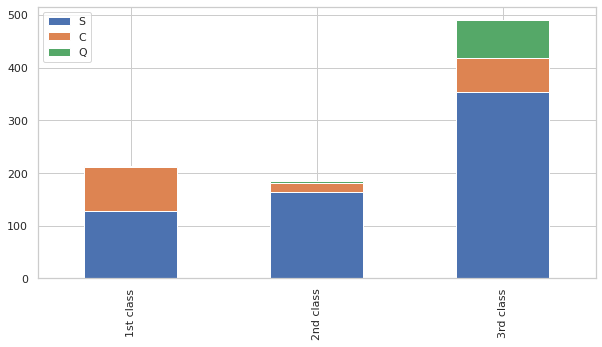

In [355]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

#### more than 50% of 1st class are from S embark
#### more than 50% of 2nd class are from S embark
#### more than 50% of 3rd class are from S embark

#### **fill out missing embark with S embark**

In [356]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [357]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare

fill missing Fare with median fare for each Pclass

In [358]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [359]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


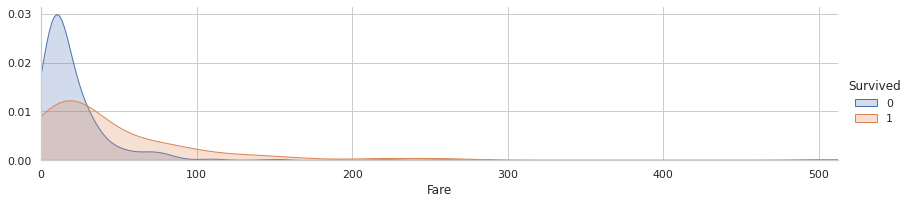

In [360]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, train["Fare"].max()))
facet.add_legend()
plt.show()

(0.0, 40.0)

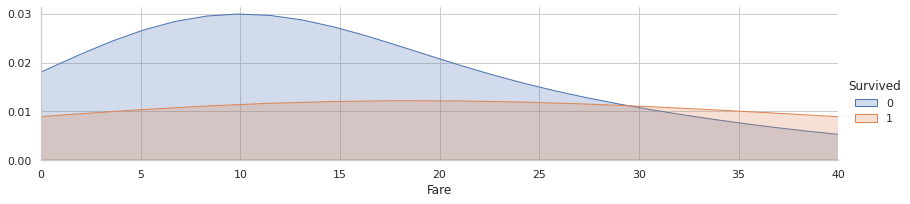

In [361]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, train["Fare"].max()))
facet.add_legend()
plt.xlim(0, 40)

In [362]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 30, 'Fare'] = 0
    # dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    # dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 1

In [363]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0000,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0000,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0000,NaN,0,0


### 4.7 Cabin

fill missing Fare with median fare for each Pclass

In [364]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
E101           3
              ..
D7             1
E31            1
D47            1
A7             1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [365]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


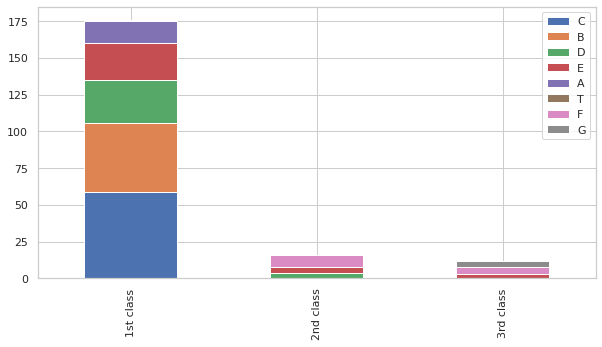

In [366]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
display(df)
df.plot(kind='bar', stacked=True, figsize=(10,5))

#### A, B, C Cabin은 오로지 1st class에서만 사용되었고, D, E, F Cabin은 2nd class, E, F, G Cabin은 3rd class에서 사용됐다.
#### Feature Engineering 할 때, 연관성이 있는 특징의 연관성은 살려주고, 반면에 연관성이 떨어질 경우, 연관성을 줄여줘야한다.
#### {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}로 매핑할 경우, 낮은 숫자는 1등급 사람들, 즉 살아난 확률이 많은 클래스의 연관성이 커지고, 높은 숫자는 3등급, 즉 비생존 확률이 높아질 것으로 보입니다.

In [367]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [368]:
train['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.8 FamilySize

In [369]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

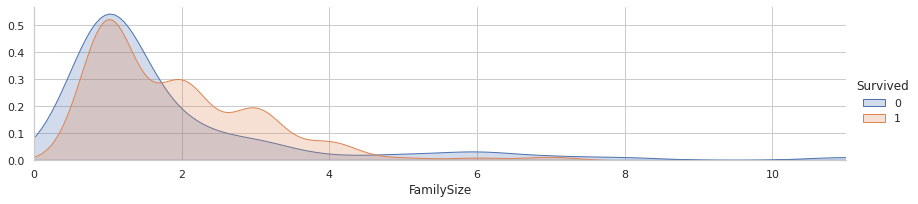

In [370]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "FamilySize", shade=True)
facet.set(xlim=(0, train["FamilySize"].max()))
facet.add_legend()
plt.xlim(0)

In [371]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2.0, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4.0}

for dataset in train_test_data:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [372]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0000,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0000,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,53.1000,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0000,2.0,0,0,0.0


In [373]:
features_drop = ["Ticket", "SibSp", "Parch"]
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(["PassengerId"], axis=1)

In [374]:
train_data = train.drop("Survived", axis=1)
target = train["Survived"]

train_data.shape, target.shape

((891, 8), (891,))

In [375]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0000,2.0,0,0,0.4
1,1,1,3.0,71.2833,0.8,1,2,0.4
2,3,1,1.0,0.0000,2.0,0,1,0.0
3,1,1,2.0,53.1000,0.8,0,2,0.4
4,3,0,2.0,0.0000,2.0,0,0,0.0
5,3,0,2.0,0.0000,2.0,2,0,0.0
6,1,0,3.0,51.8625,1.6,0,0,0.0
7,3,0,0.0,0.0000,2.0,0,3,1.6
8,3,1,2.0,0.0000,2.0,0,2,0.8
9,2,1,0.0,30.0708,1.8,1,2,0.4


## 5. Modeling

In [376]:
# Import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # Support Vector Machine

import numpy as np

In [377]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


### 5.0 Cross Validation (K-fold)

In [378]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle=True, random_state=42)

### 5.1 KNN

In [422]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_score = cross_val_score(knn_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')

print(knn_score)
print("KNN Average Score:", round(np.mean(knn_score) * 100, 2))

[0.82222222 0.78651685 0.83146067 0.79775281 0.80898876 0.79775281
 0.7752809  0.78651685 0.75280899 0.88764045]
KNN Average Score: 80.47


### 5.2 Decision Tree

In [423]:
dt_clf = DecisionTreeClassifier()
dt_score = cross_val_score(dt_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')

print(dt_score)
print("Decision Tree Average Score:", round(np.mean(dt_score) * 100, 2))

[0.84444444 0.78651685 0.78651685 0.74157303 0.82022472 0.84269663
 0.74157303 0.76404494 0.75280899 0.88764045]
Decision Tree Average Score: 79.68


### 5.3 Random Forest

In [467]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_score = cross_val_score(rf_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')

print(rf_score)
print("Random Forest Average Score:", round(np.mean(rf_score) * 100, 2))

[0.85555556 0.80898876 0.79775281 0.79775281 0.84269663 0.86516854
 0.79775281 0.78651685 0.76404494 0.91011236]
Random Forest Average Score: 82.26


### 5.4 Naive Bayes

In [471]:
nb_clf = GaussianNB()
nb_score = cross_val_score(nb_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')

print(nb_score)
print("Naive Bayes Average Score:", round(np.mean(nb_score) * 100, 2))

[0.76666667 0.80898876 0.84269663 0.78651685 0.79775281 0.79775281
 0.78651685 0.74157303 0.73033708 0.84269663]
Naive Bayes Average Score: 79.01


### 5.5 Support Vector Machine(SVM)

In [474]:
svm_clf = SVC()
svm_score = cross_val_score(svm_clf, train_data, target, cv=k_fold, n_jobs=-1, scoring='accuracy')

print(svm_score)
print("Support Vector Machine Average Score:", round(np.mean(svm_score) * 100, 2))

[0.61111111 0.69662921 0.66292135 0.76404494 0.70786517 0.68539326
 0.6741573  0.71910112 0.65168539 0.80898876]
Support Vector Machine Average Score: 69.82


## 6. Testing

In [477]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = rf_clf.predict(test_data)
print(prediction)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [478]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                           "Survived": prediction})

display(submission)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [479]:
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/submission.csv", index=False)

# Test Score with Random Forest: 0.77272
## need to be reengineering in features